In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math



# Estimations

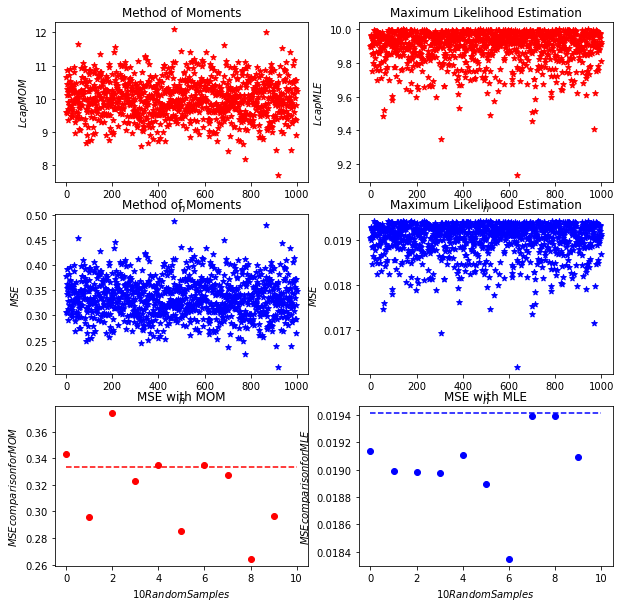

In [2]:


n = 100
L = 10

L_cap_MLE = []
L_cap_MOM = []
MSE_L_cap_MOM = []
MSE_L_cap_MLE = []
x = []


def mse_mom(L, N):
	return math.pow(L, 2) / (3 * N)


def mse_mle(L, N):
	return (math.pow(L, 2) * 2) / ((N + 1) * (N + 2))


for j in range(1000):
	''' n data points in a uniform distribution [0,L) '''
	dataPoints = np.random.uniform(0, L, n)

	''' The theoretical estimation of L with the 2 methods '''
	mom = 2 * (np.sum(dataPoints)/n)
	mle = np.max(dataPoints)

	L_cap_MOM.append(mom)
	''' The MSE for estimation of L using Method of Moments '''
	MSE_L_cap_MOM.append(mse_mom(mom, n))

	L_cap_MLE.append(mle)
	''' The MSE for estimation of L using Maximum Likelihood Estimation '''
	MSE_L_cap_MLE.append(mse_mle(mle, n))

	x.append(j)

fig, ((L_MOM, L_MLE), (MSE_MOM, MSE_MLE), (MSE_comp_MOM, MSE_comp_MLE)) = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
L_MOM.scatter(x=np.asarray(x), y=L_cap_MOM, marker='*', c='r', edgecolor='r')
L_MOM.set_title('Method of Moments')
L_MOM.set_xlabel('$n$')
L_MOM.set_ylabel('$LcapMOM$')

L_MLE.scatter(x=np.asarray(x), y=L_cap_MLE, marker='*', c='r', edgecolor='r')
L_MLE.set_title('Maximum Likelihood Estimation')
L_MLE.set_xlabel('$n$')
L_MLE.set_ylabel('$LcapMLE$')

MSE_MOM.scatter(x=np.asarray(x), y=MSE_L_cap_MOM, marker='*', c='b', edgecolor='b')
MSE_MOM.set_title('Method of Moments')
MSE_MOM.set_xlabel('$n$')
MSE_MOM.set_ylabel('$MSE$')

MSE_MLE.scatter(x=np.asarray(x), y=MSE_L_cap_MLE, marker='*', c='b', edgecolor='b')
MSE_MLE.set_title('Maximum Likelihood Estimation')
MSE_MLE.set_xlabel('$n$')
MSE_MLE.set_ylabel('$MSE$')

''' Calculating Theoretical values for MSEs '''
theoretical_MSE_MOM = mse_mom(L, n)
theoretical_MSE_MLE = mse_mle(L, n)

''' Random sampling 10 values from MSE calculated to compare estimated and theoretical '''
random_MSE_MOM = np.random.choice(MSE_L_cap_MOM, 10)
random_MSE_MLE = np.random.choice(MSE_L_cap_MLE, 10)

# MSE_comp_MOM
MSE_comp_MOM.plot([0,10], [theoretical_MSE_MOM, theoretical_MSE_MOM], 'r--')
MSE_comp_MOM.scatter(x=[i for i in range(10)], y=random_MSE_MOM, marker='o', c='r', edgecolor='r')
MSE_comp_MOM.set_title('MSE with MOM')
MSE_comp_MOM.set_xlabel('$10 Random Samples$')
MSE_comp_MOM.set_ylabel('$MSE comparison for MOM$')

# MSE_comp_MLE
MSE_comp_MLE.plot([0,10], [theoretical_MSE_MLE, theoretical_MSE_MLE], 'b--')
MSE_comp_MLE.plot((theoretical_MSE_MLE, ), 'b--')
MSE_comp_MLE.scatter(x=[i for i in range(10)], y=random_MSE_MLE, marker='o', c='b', edgecolor='b')
MSE_comp_MLE.set_title('MSE with MLE')
MSE_comp_MLE.set_xlabel('$10 Random Samples$')
MSE_comp_MLE.set_ylabel('$MSE comparison for MLE$')


plt.savefig("obs.jpg")
plt.show()




